## Análisis de Datos Exploratorio de datos de TIMESAT


Equipo:



*   Martha Juarez 
*   Adilene Calderón
*   Paola Velez
*   Benjamin Lopez
*   Carlos Velázquez
*   Ibsan Morales
*   Manuel Valenzuela
*   Samuel Cortez

## Importando librerias necesarias

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import IsolationForest

## Lectura de Datos

In [ ]:
datos_evi = pd.read_excel('/content/VAR_FEN_EVI_D&F.xlsx')

In [ ]:
datos_ndvi = pd.read_excel('/content/VAR_FEN_NDVI_D&F.xlsx')

## Explorando Datos EVI (variables fenologicas)

In [ ]:
#Observamos los 5 primeros registros de los datos
datos_evi.head()

,CLASE_VEG,inicio,inicio - (X),INICIO,AMPLITUD,duracion,DURACION,INTMAY,INTMEN
0,ENCINAR_D,10.81,0,172.96,1987,10.460,167.360,32030,13410
1,ENCINAR_D,33.81,23,172.96,1972,9.267,148.272,30020,12640
2,ENCINAR_D,58.01,46,192.16,1782,8.322,133.152,24720,10770
3,ENCINAR_D,81.96,69,207.36,2162,16.180,258.880,41990,16480
4,ENCINAR_D,104.70,92,203.20,1629,16.790,268.640,40850,14580


In [ ]:
#Analizando dimensiones del Dataset
print("Dimensiones del Dataset:")
print("-" * 25)
print(f"Registros: {datos_evi.shape[0]}")
print(f"Columnas: {datos_evi.shape[1]}")
print("-" * 25)

Dimensiones del Dataset:
-------------------------
Registros: 280
Columnas: 9
-------------------------


In [ ]:
#Cambiando tipo de datos
datos_evi['CLASE_VEG'] = datos_evi['CLASE_VEG'].astype('category')
datos_evi.dtypes

CLASE_VEG       category
inicio           float64
inicio - (X)       int64
INICIO           float64
AMPLITUD           int64
duracion         float64
DURACION         float64
INTMAY             int64
INTMEN             int64
dtype: object

In [ ]:
#Observando valores perdidos
datos_evi.isnull().sum()

CLASE_VEG       0
inicio          0
inicio - (X)    0
INICIO          0
AMPLITUD        0
duracion        0
DURACION        0
INTMAY          0
INTMEN          0
dtype: int64

In [ ]:
#Observando valores duplicados
duplicate_rows_df = datos_evi[datos_evi.duplicated()]
duplicate_rows_df.shape
print(f'Numero de registros duplicados: {duplicate_rows_df.shape[0]}')

Numero de registros duplicados: 0


In [ ]:
#Renombrando columnas
datos_evi = datos_evi.rename(columns={'AMPLITUD ': 'AMPLITUD'})

### EDA

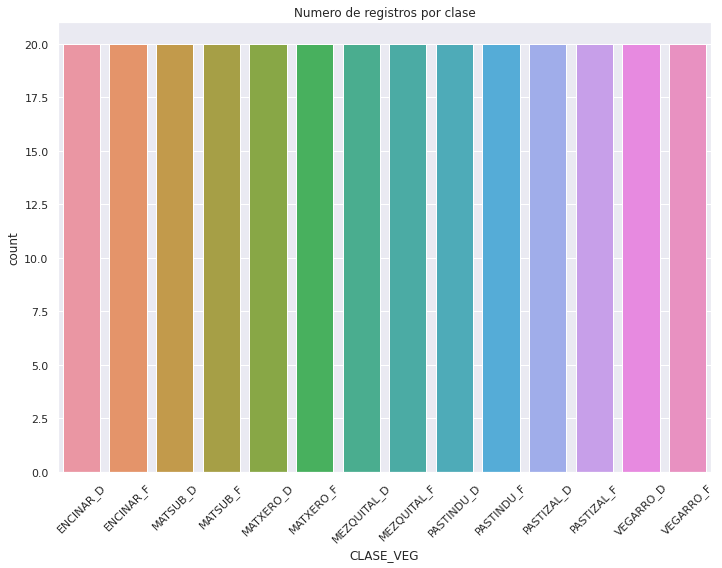

In [ ]:
#Analizando numero de registros por clase
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(data = datos_evi, x = 'CLASE_VEG')
plt.title('Numero de registros por clase')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
#Veremos la media, minima y maxima de algunas caracteristicas
datos_evi[["CLASE_VEG", "INICIO", "AMPLITUD", "DURACION", "INTMEN"]].groupby('CLASE_VEG').agg(['mean','min', 'max', 'std'])

INICIO                  ... INTMEN                    
                mean     min     max  ...    min    max          std
CLASE_VEG                             ...                           
ENCINAR_D    187.352   78.40  207.36  ...   9286  24090  4080.378409
ENCINAR_F    186.856  169.60  204.80  ...  12560  21910  2608.353937
MATSUB_D     188.368  168.64  211.20  ...  10510  21860  3173.196753
MATSUB_F     186.672  165.92  201.60  ...  13550  25430  3033.112176
MATXERO_D    189.696  168.48  208.00  ...  10270  21670  2935.438459
MATXERO_F    187.352  165.76  200.00  ...   9278  18570  2646.317409
MEZQUITAL_D  181.816  108.80  202.56  ...   6475  16880  2801.411437
MEZQUITAL_F  171.848   83.20  196.80  ...   9442  17890  2379.999811
PASTINDU_D   188.656  165.44  200.00  ...  10640  25280  4191.493233
PASTINDU_F   187.856  164.00  200.00  ...  10560  23020  3458.976841
PASTIZAL_D   192.552  172.32  203.20  ...   7204  17950  3105.944062
PASTIZAL_F   188.520  175.36  200.00  ...  13960  24880  3219.626122
VEGARRO_D    189.720  169.28  204.80  ...   9860  20750  3049.897324
VEGARRO_F    187.664  167.52  201.60  ...  12290  21930  2599.553808

[14 rows x 16 columns]

### Histogramas

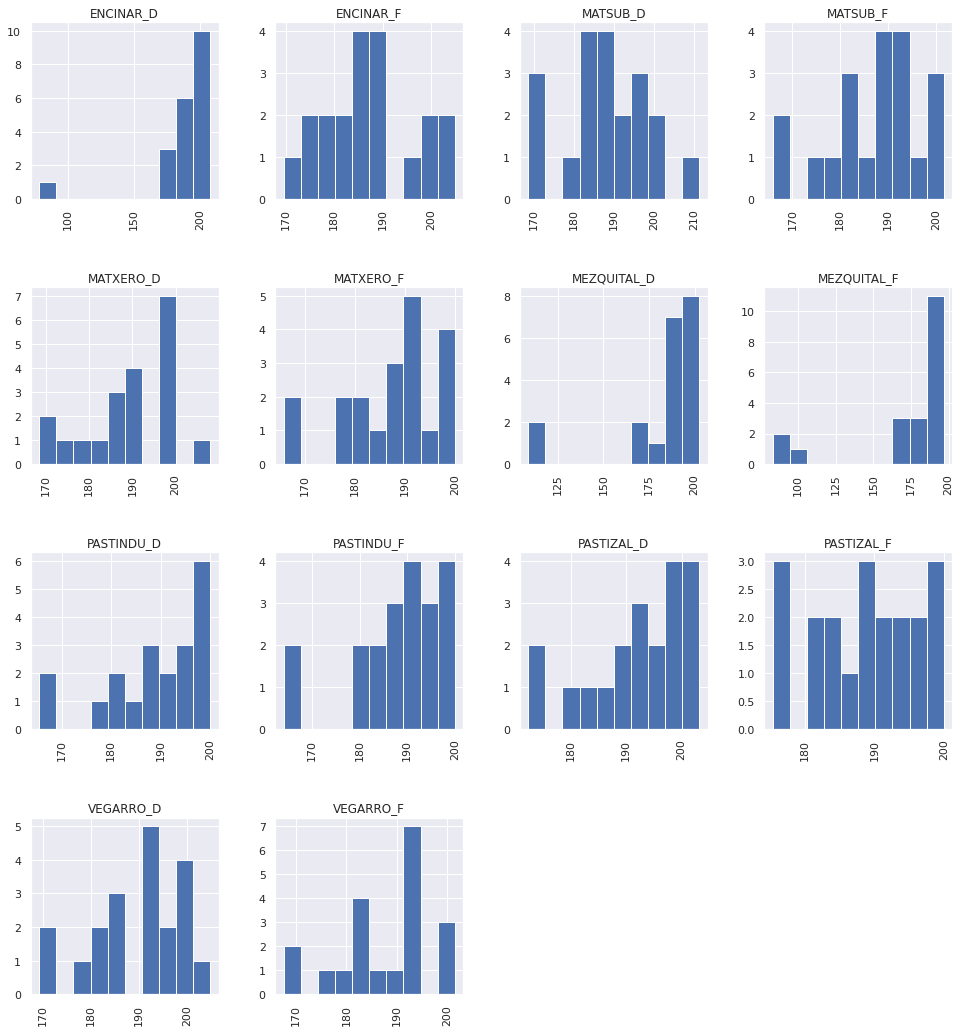

In [ ]:
#Observando la distribución de las caracteristicas de cada distinta clase
datos_evi[['INICIO']].hist(by=datos_evi['CLASE_VEG'],  figsize = (16,18));


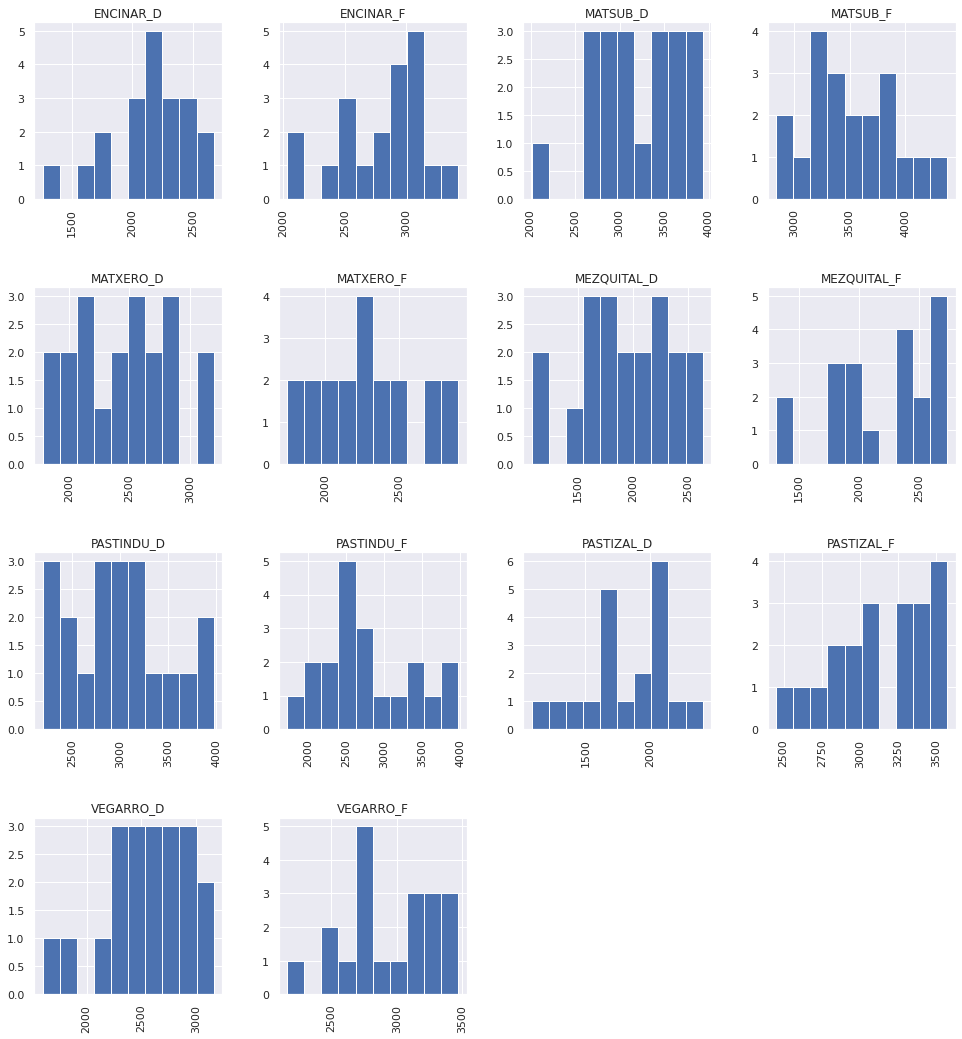

In [ ]:
#Observando la distribución de las caracteristicas de cada distinta clase
datos_evi[['AMPLITUD']].hist(by=datos_evi['CLASE_VEG'],  figsize = (16,18));

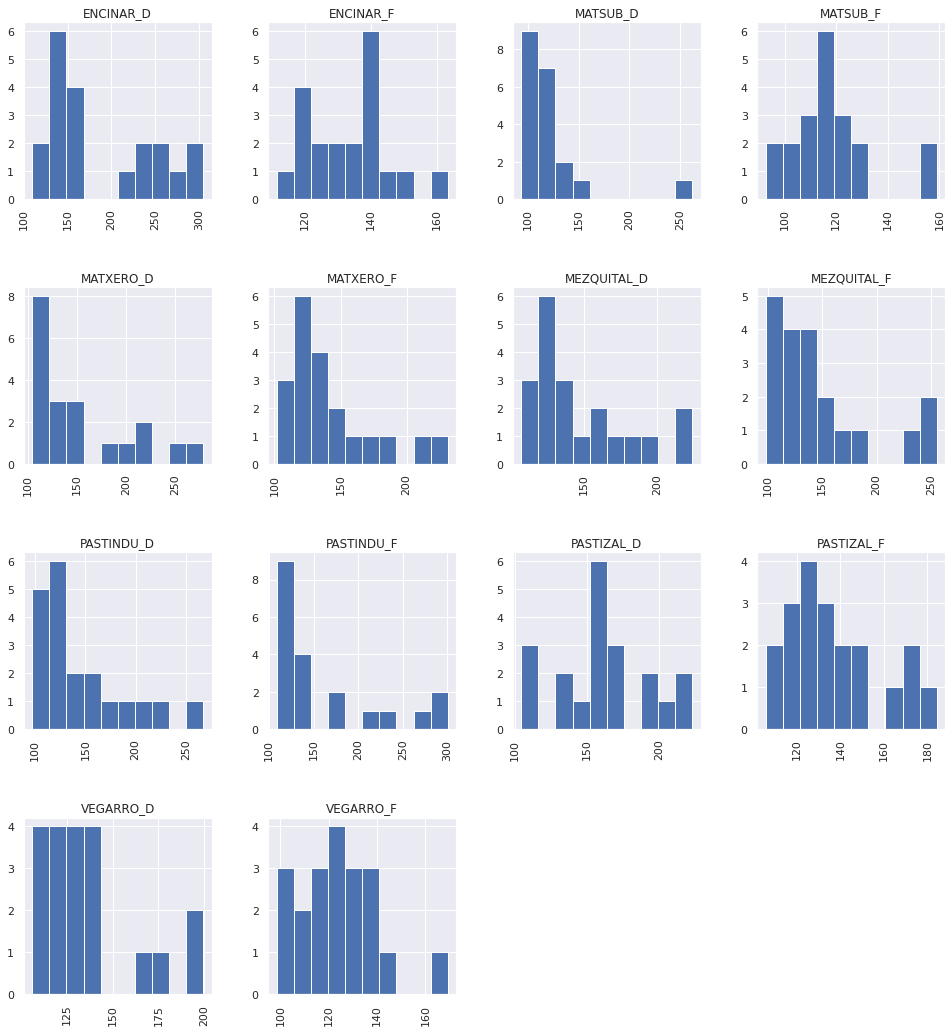

In [ ]:
#Observando la distribución de las caracteristicas de cada distinta clase
datos_evi[['DURACION']].hist(by=datos_evi['CLASE_VEG'],  figsize = (16,18));

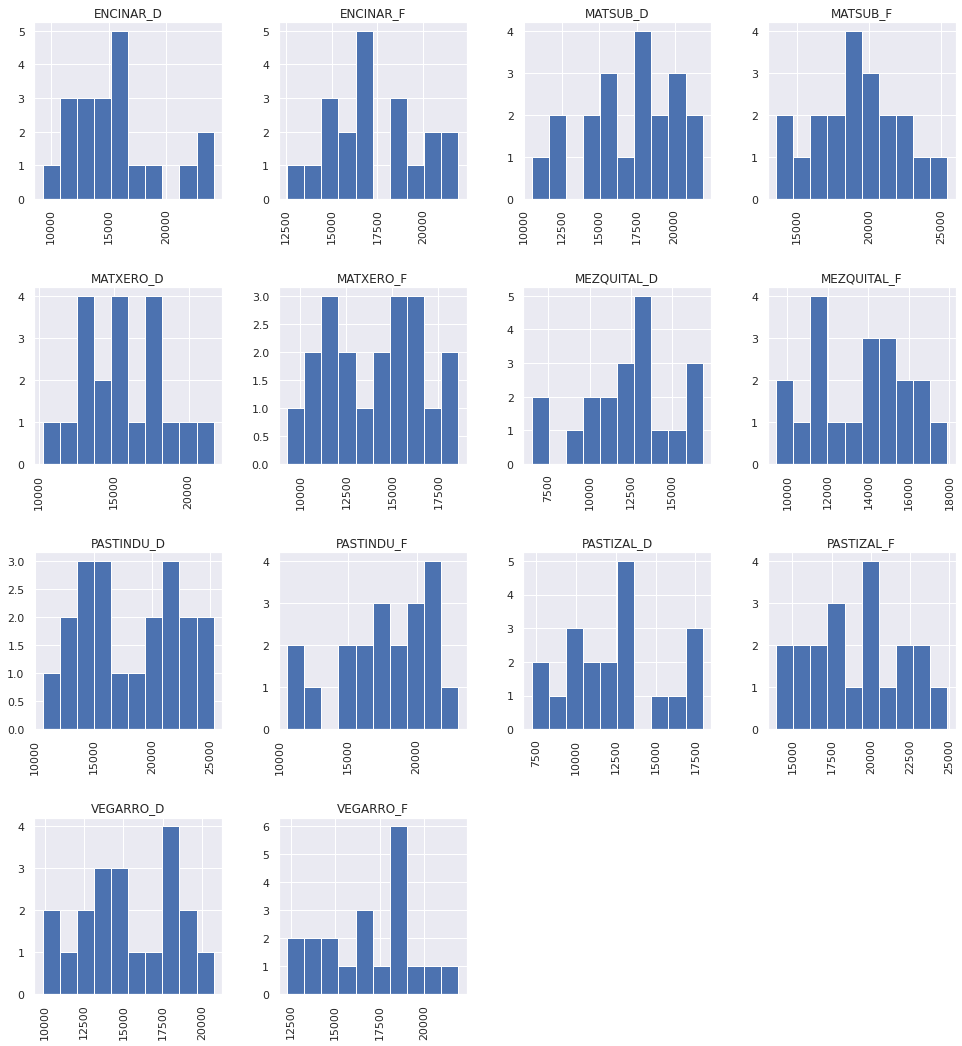

In [ ]:
#Observando la distribución de las caracteristicas de cada distinta clase
datos_evi[['INTMEN']].hist(by=datos_evi['CLASE_VEG'],  figsize = (16,18));

### Diagramas de Caja

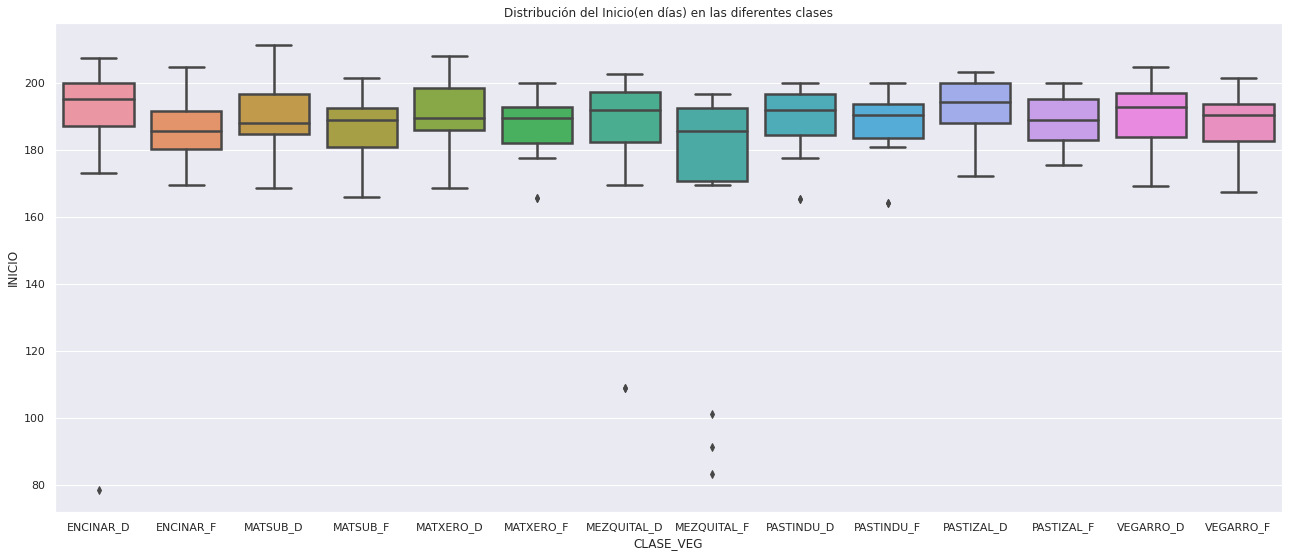

In [ ]:
sns.set(rc={'figure.figsize':(22,9)})
ax = sns.boxplot(x="CLASE_VEG", y="INICIO", data=datos_evi, linewidth=2.5)
ax.set_title('Distribución del Inicio(en días) en las diferentes clases');

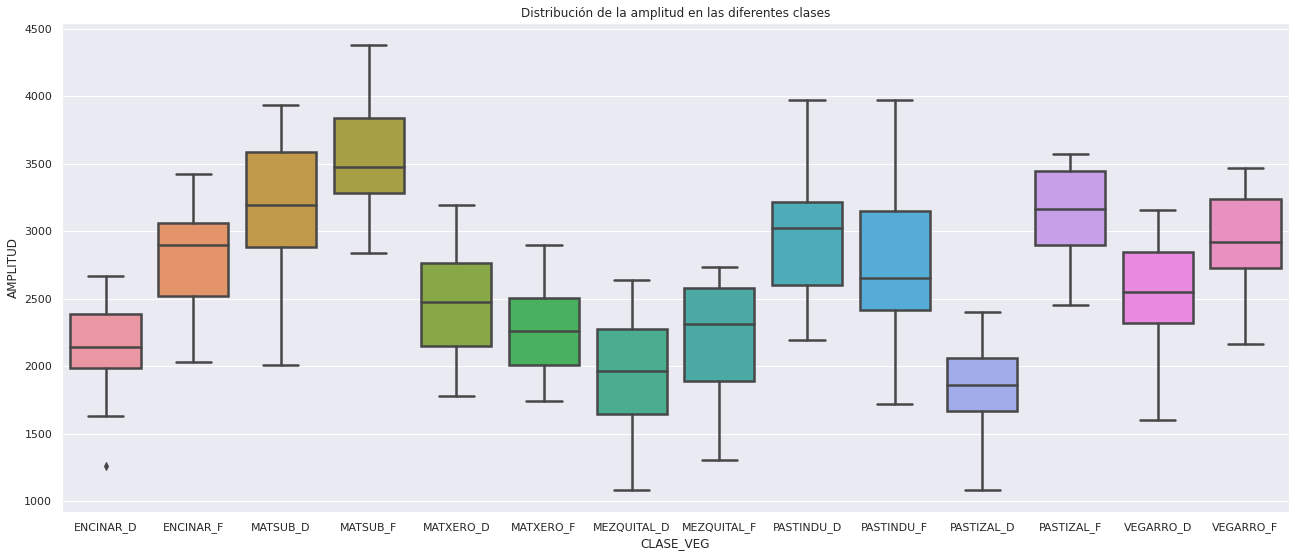

In [ ]:
sns.set(rc={'figure.figsize':(22,9)})
ax = sns.boxplot(x="CLASE_VEG", y="AMPLITUD", data=datos_evi, linewidth=2.5)
ax.set_title('Distribución de la amplitud en las diferentes clases');

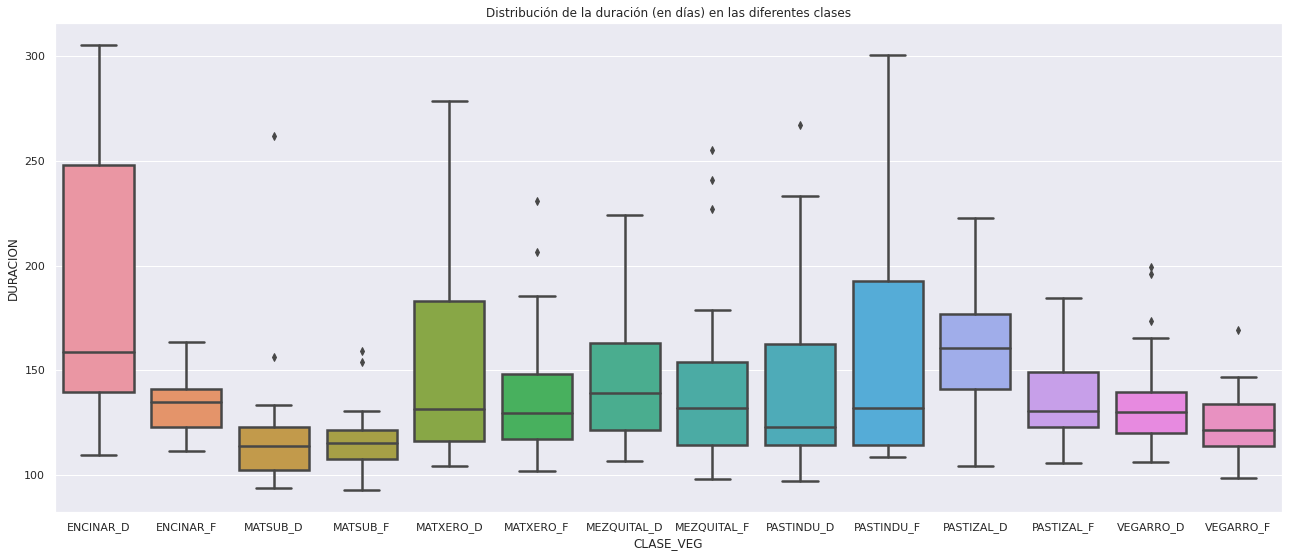

In [ ]:
sns.set(rc={'figure.figsize':(22,9)})
ax = sns.boxplot(x="CLASE_VEG", y="DURACION", data=datos_evi, linewidth=2.5)
ax.set_title('Distribución de la duración (en días) en las diferentes clases');

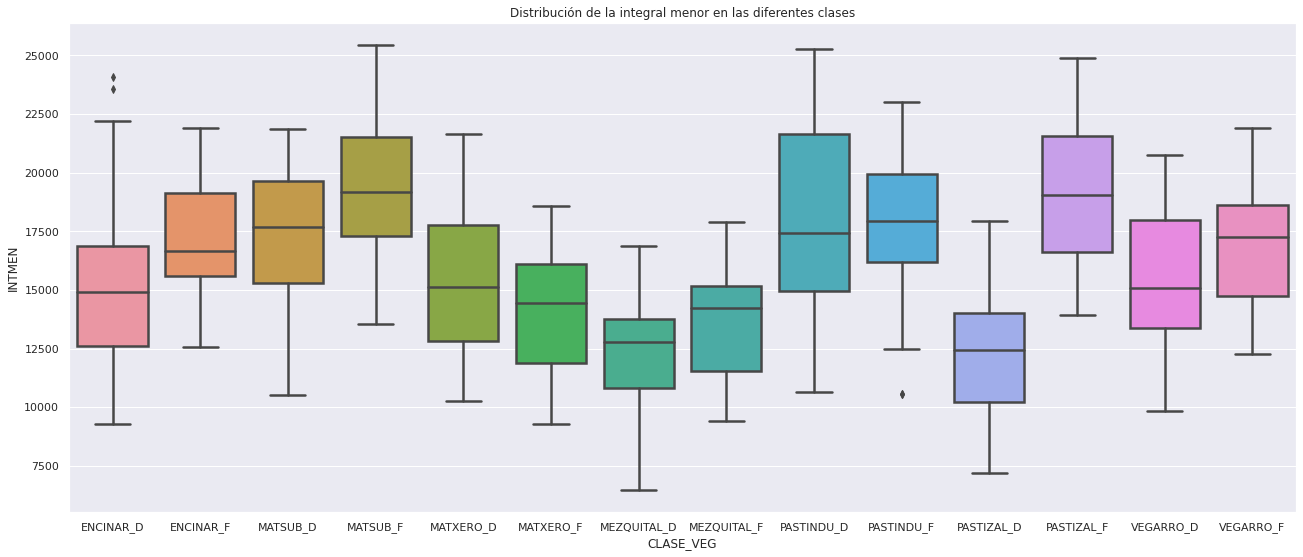

In [ ]:
sns.set(rc={'figure.figsize':(22,9)})
ax = sns.boxplot(x="CLASE_VEG", y="INTMEN", data=datos_evi, linewidth=2.5)
ax.set_title('Distribución de la integral menor en las diferentes clases');

### Removiendo Outliers

In [ ]:
#Para remover outliers utilizaremos Isolation Forest
model = IsolationForest(
                n_estimators  = 1000,
                max_samples   ='auto',
                contamination = 0.1,
                n_jobs        = -1,
                random_state  = 123,
            )

model.fit(datos_evi[['INICIO', 'AMPLITUD', 'DURACION', 'INTMEN']])

print(model.get_params())

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


{'bootstrap': False, 'contamination': 0.1, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 1000, 'n_jobs': -1, 'random_state': 123, 'verbose': 0, 'warm_start': False}


In [ ]:
datos_evi['scores'] = model.decision_function(datos_evi[['INICIO', 'AMPLITUD', 'DURACION', 'INTMEN']])

datos_evi['anomaly_score'] = model.predict(datos_evi[['INICIO', 'AMPLITUD', 'DURACION', 'INTMEN']])


In [ ]:
datos_evi[datos_evi['anomaly_score'] == -1]

,CLASE_VEG,inicio,inicio - (X),INICIO,AMPLITUD,duracion,DURACION,INTMAY,INTMEN,scores,anomaly_score
3,ENCINAR_D,81.96,69,207.36,2162,16.180,258.880,41990,16480,-0.013272,-1
4,ENCINAR_D,104.70,92,203.20,1629,16.790,268.640,40850,14580,-0.055369,-1
6,ENCINAR_D,142.90,138,78.40,1259,15.950,255.200,41880,12100,-0.166956,-1
10,ENCINAR_D,241.20,230,179.20,2230,19.070,305.120,54670,23590,-0.077514,-1
18,ENCINAR_D,426.40,414,198.40,2454,14.610,233.760,46750,22220,-0.002533,-1
19,ENCINAR_D,448.40,437,182.40,2266,17.870,285.920,54860,24090,-0.062597,-1
45,MATSUB_D,127.30,115,196.80,3010,16.370,261.920,42990,20200,-0.015974,-1
46,MATSUB_D,151.20,138,211.20,2716,5.848,93.568,22740,12190,-0.030548,-1
71,MATSUB_F,265.50,253,200.00,4130,7.195,115.120,34420,22240,-0.011573,-1
75,MATSUB_F,357.00,345,192.00,4376,6.602,105.632,32050,21470,-0.036483,-1


In [ ]:
datos_evi_limpios = datos_evi[datos_evi['anomaly_score'] == 1]

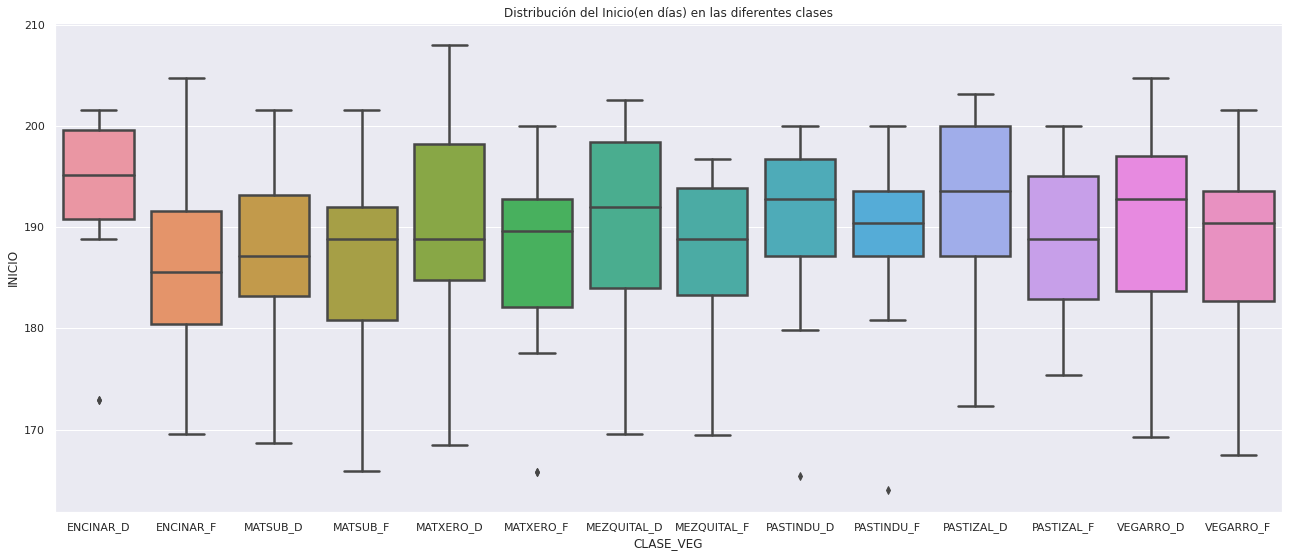

In [ ]:
sns.set(rc={'figure.figsize':(22,9)})
ax = sns.boxplot(x="CLASE_VEG", y="INICIO", data=datos_evi_limpios, linewidth=2.5)
ax.set_title('Distribución del Inicio(en días) en las diferentes clases');

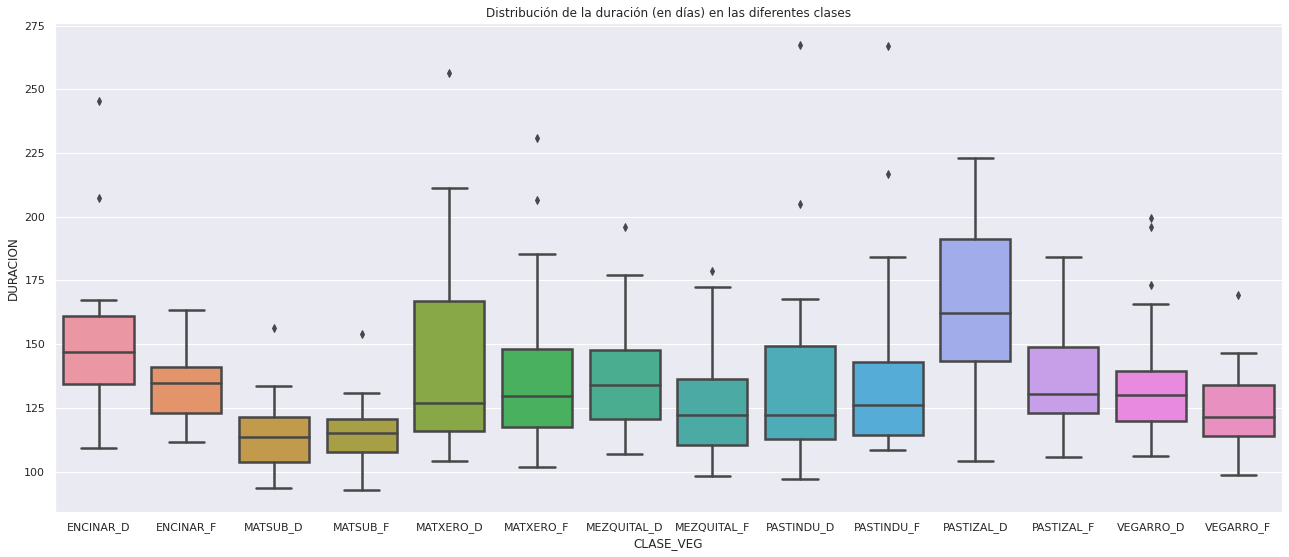

In [ ]:
sns.set(rc={'figure.figsize':(22,9)})
ax = sns.boxplot(x="CLASE_VEG", y="DURACION", data=datos_evi_limpios, linewidth=2.5)
ax.set_title('Distribución de la duración (en días) en las diferentes clases');

## Explorando datos NDVI (variables fenologicas)

### Exploracion inicial

In [ ]:
#Observamos los 5 primeros registros de los datos
datos_ndvi.head()

,CLASE_VEG,inicio,inicio - (X),INICIO,AMPLITUD,duracion,DURACION,INTMAY,INTMEN
0,ENCINAR_D,11.09,0,177.44,3145,14.41,230.56,70050,33880
1,ENCINAR_D,34.09,23,177.44,3019,18.90,302.40,89970,42230
2,ENCINAR_D,57.69,46,187.04,2814,17.88,286.08,79660,33570
3,ENCINAR_D,81.90,69,206.40,3614,17.36,277.76,83110,39800
4,ENCINAR_D,104.60,92,201.60,2878,18.26,292.16,81110,36720


In [ ]:
#Analizando dimensiones del Dataset
print("Dimensiones del Dataset:")
print("-" * 25)
print(f"Registros: {datos_ndvi.shape[0]}")
print(f"Columnas: {datos_ndvi.shape[1]}")
print("-" * 25)

Dimensiones del Dataset:
-------------------------
Registros: 280
Columnas: 9
-------------------------


In [ ]:
#Cambiando tipo de datos
datos_ndvi['CLASE_VEG'] = datos_ndvi['CLASE_VEG'].astype('category')
datos_ndvi.dtypes

CLASE_VEG       category
inicio           float64
inicio - (X)       int64
INICIO           float64
AMPLITUD           int64
duracion         float64
DURACION         float64
INTMAY             int64
INTMEN             int64
dtype: object

In [ ]:
#Observando valores perdidos
datos_ndvi.isnull().sum()

CLASE_VEG       0
inicio          0
inicio - (X)    0
INICIO          0
AMPLITUD        0
duracion        0
DURACION        0
INTMAY          0
INTMEN          0
dtype: int64

In [ ]:
duplicate_rows_df = datos_ndvi[datos_ndvi.duplicated()]
duplicate_rows_df.shape
print(f'Numero de registros duplicados: {duplicate_rows_df.shape[0]}')

Numero de registros duplicados: 0


In [ ]:
#Renombrando columnas
datos_ndvi = datos_ndvi.rename(columns={'AMPLITUD ': 'AMPLITUD'})

### EDA 

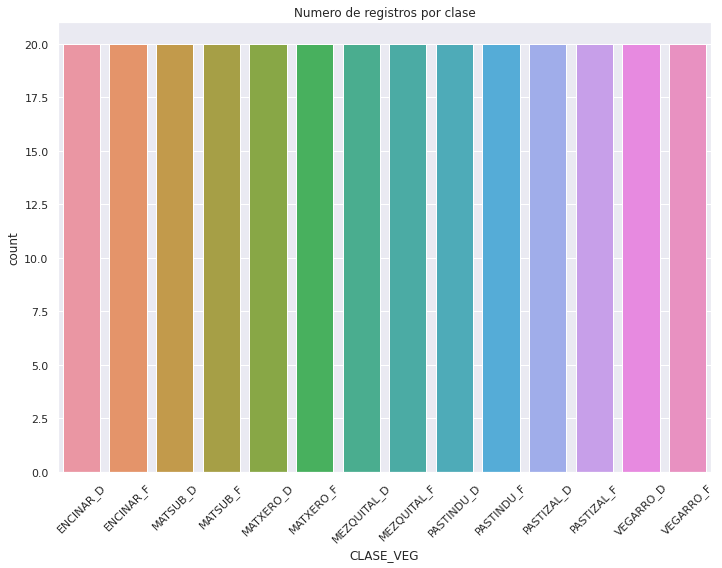

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(data = datos_ndvi, x = 'CLASE_VEG')
plt.title('Numero de registros por clase')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
#Veremos la media, minima y maxima de algunas caracteristicas
datos_ndvi[["CLASE_VEG", "INICIO", "AMPLITUD", "DURACION", "INTMEN"]].groupby('CLASE_VEG').agg(['mean','min', 'max', 'std'])

INICIO                 ... INTMEN                     
                mean     min    max  ...    min    max           std
CLASE_VEG                            ...                            
ENCINAR_D    193.896  177.44  206.4  ...  24120  59900   8444.620757
ENCINAR_F    188.624  176.00  203.2  ...  36470  66540   7407.150102
MATSUB_D     188.416  168.00  211.2  ...  27090  67600  11677.159487
MATSUB_F     185.872  165.76  200.0  ...  32490  63830   8878.432709
MATXERO_D    189.632  167.68  209.6  ...  20100  47990   6906.440530
MATXERO_F    186.880  165.12  200.0  ...  22780  43920   5468.167595
MEZQUITAL_D  191.240  169.76  201.6  ...  16990  40170   5766.760903
MEZQUITAL_F  184.904   92.80  203.2  ...  14840  33050   4799.625287
PASTINDU_D   187.992  164.96  201.6  ...  25920  56590   7400.789503
PASTINDU_F   187.288  164.48  201.6  ...  26500  45320   4626.430334
PASTIZAL_D   192.288  172.96  203.2  ...  17300  43170   6261.112731
PASTIZAL_F   187.904  175.52  200.0  ...  27590  49310   6090.795990
VEGARRO_D    190.232  168.64  209.6  ...  25180  53680   6455.855665
VEGARRO_F    187.400  167.04  203.2  ...  31200  57870   6726.309616

[14 rows x 16 columns]

### Histogramas

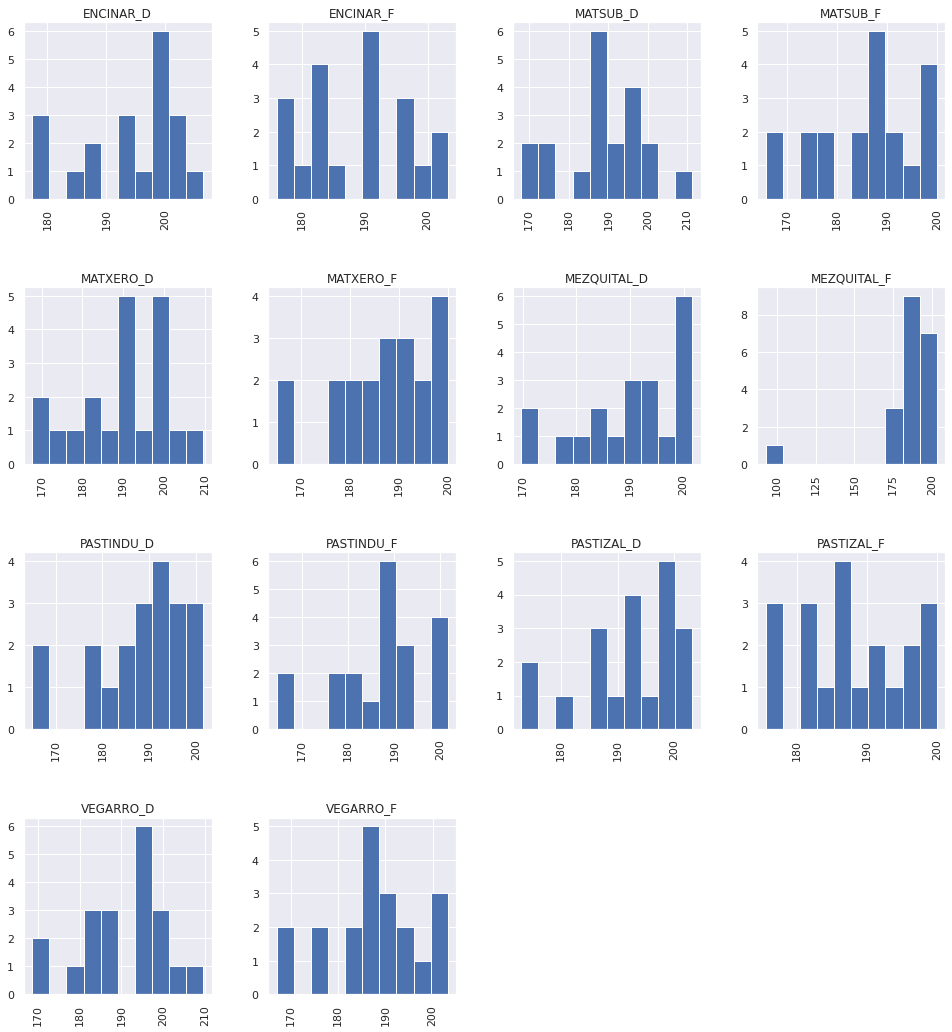

In [ ]:
#Observando la distribución de las caracteristicas de cada distinta clase
datos_ndvi[['INICIO']].hist(by=datos_ndvi['CLASE_VEG'],  figsize = (16,18));

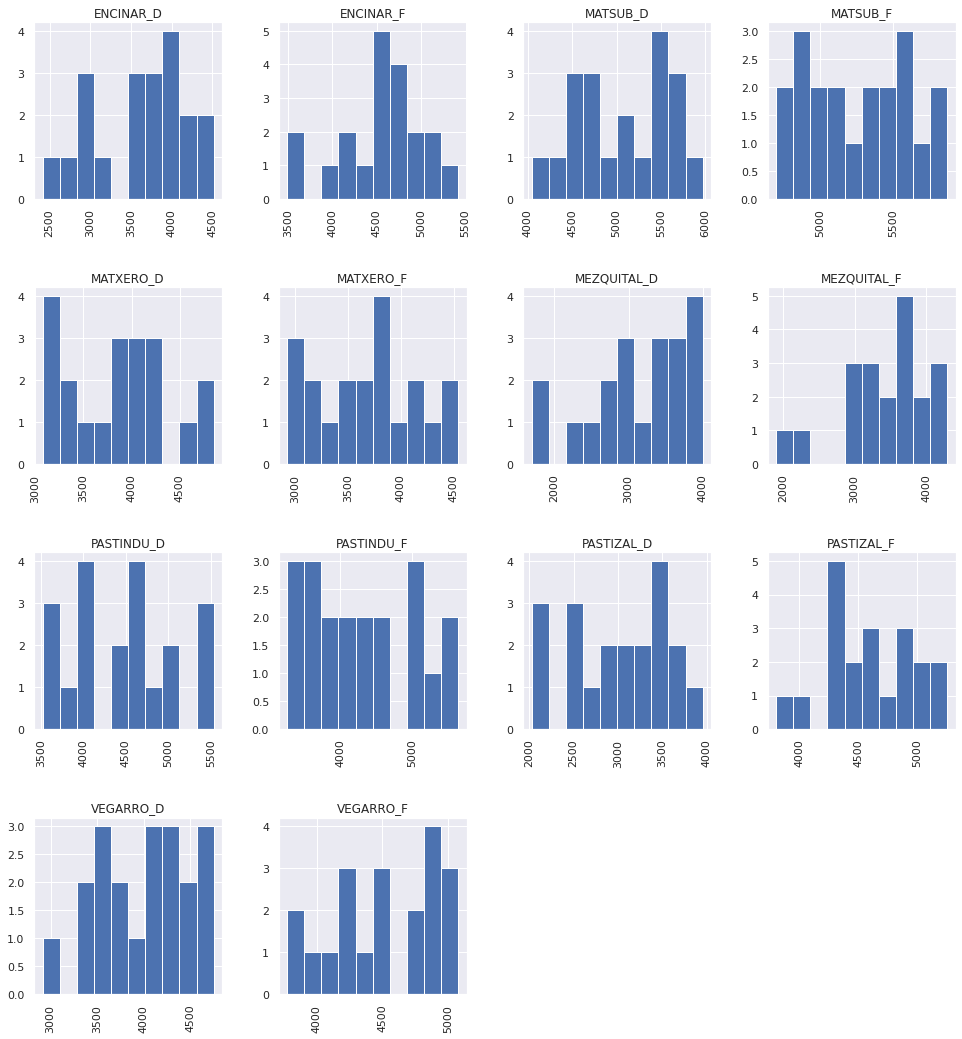

In [ ]:
#Observando la distribución de las caracteristicas de cada distinta clase
datos_ndvi[['AMPLITUD']].hist(by=datos_ndvi['CLASE_VEG'],  figsize = (16,18));

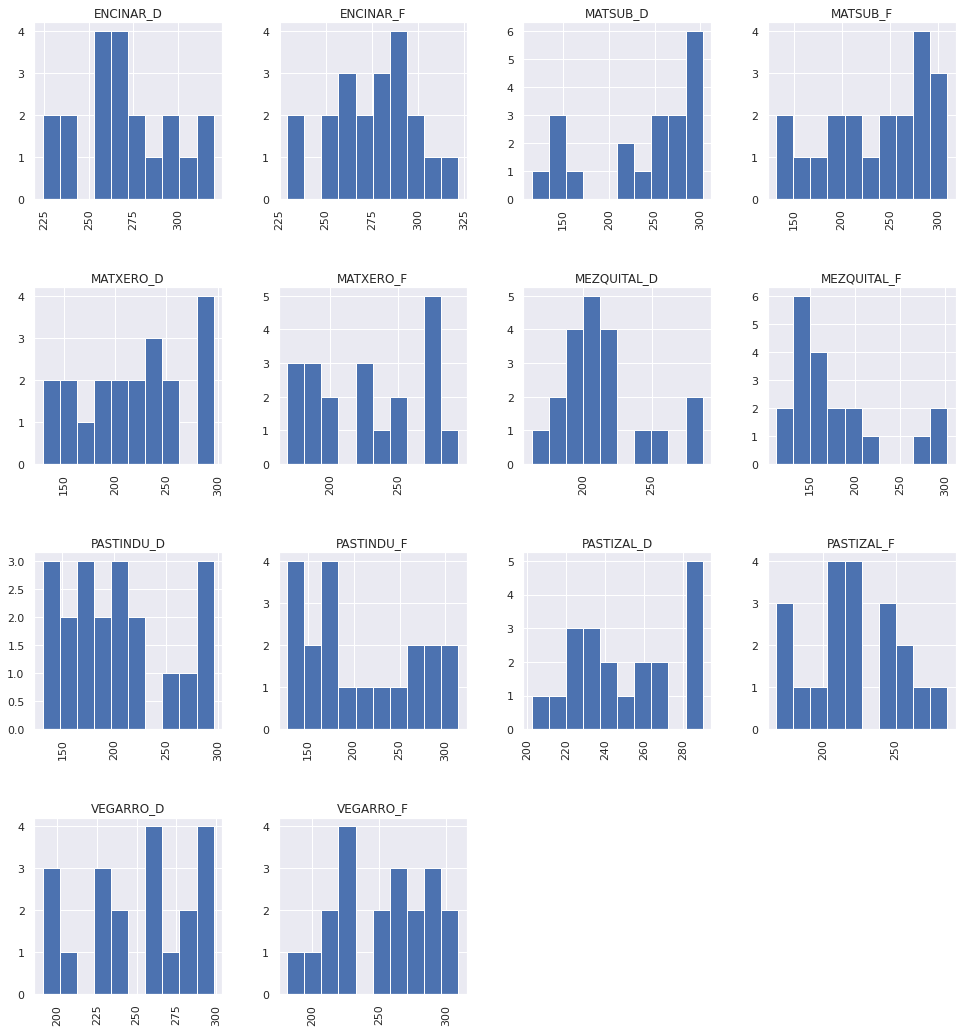

In [ ]:
#Observando la distribución de las caracteristicas de cada distinta clase
datos_ndvi[['DURACION']].hist(by=datos_ndvi['CLASE_VEG'],  figsize = (16,18));

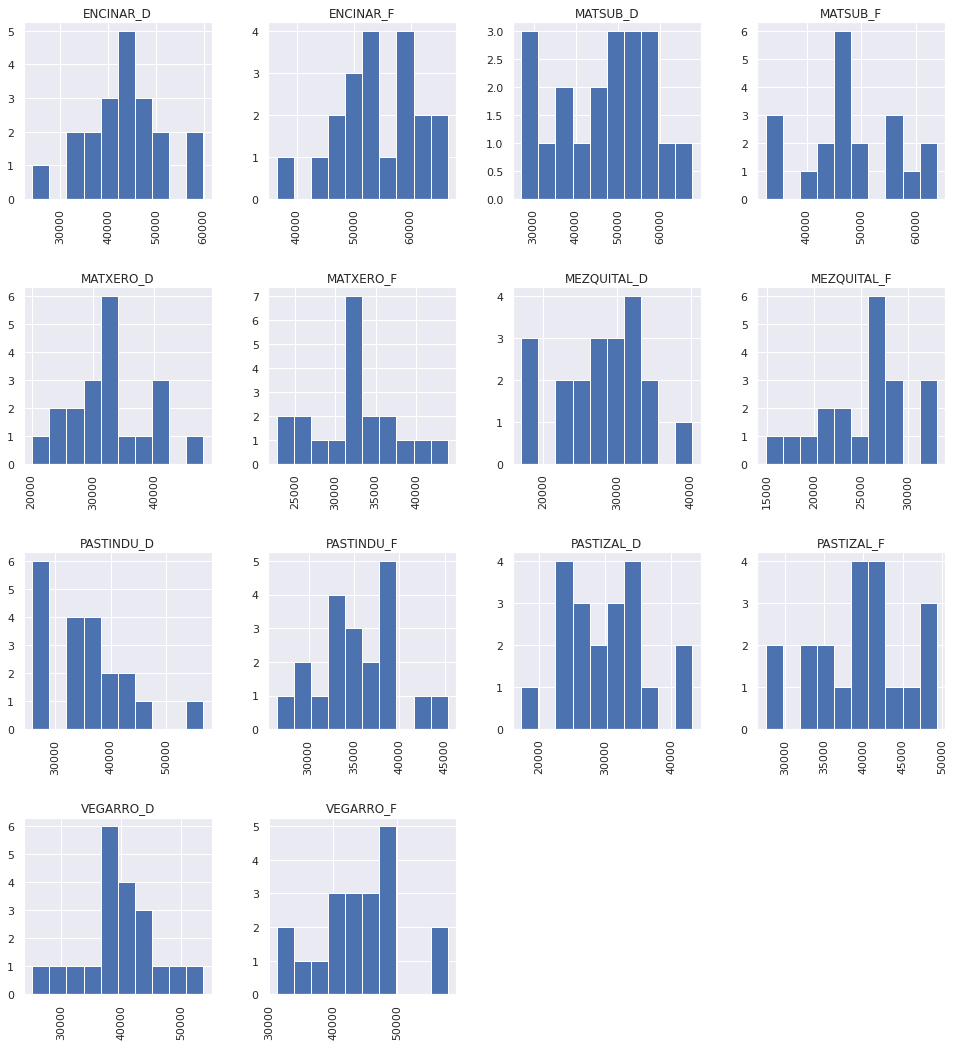

In [ ]:
#Observando la distribución de las caracteristicas de cada distinta clase
datos_ndvi[['INTMEN']].hist(by=datos_ndvi['CLASE_VEG'],  figsize = (16,18));

### Diagramas de caja


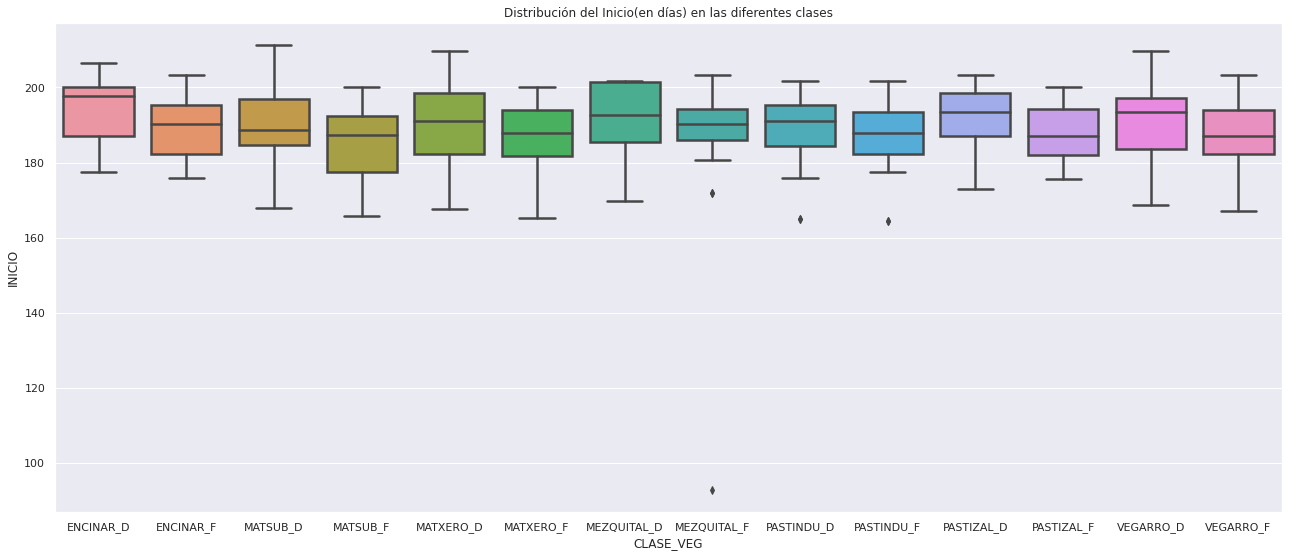

In [ ]:
sns.set(rc={'figure.figsize':(22,9)})
ax = sns.boxplot(x="CLASE_VEG", y="INICIO", data=datos_ndvi, linewidth=2.5)
ax.set_title('Distribución del Inicio(en días) en las diferentes clases');

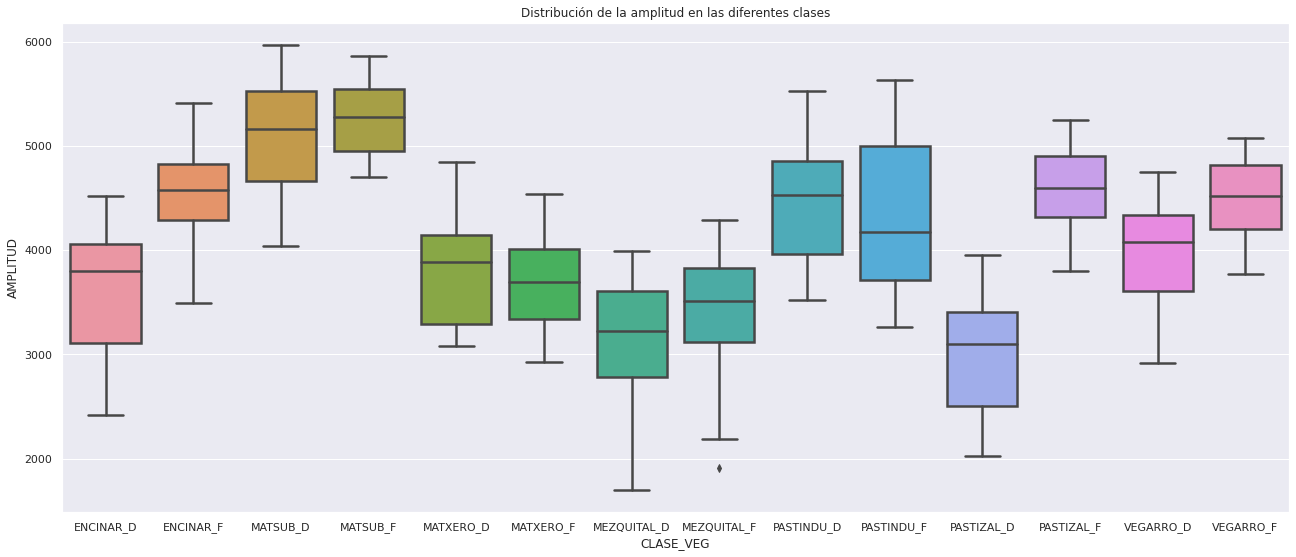

In [ ]:
sns.set(rc={'figure.figsize':(22,9)})
ax = sns.boxplot(x="CLASE_VEG", y="AMPLITUD", data=datos_ndvi, linewidth=2.5)
ax.set_title('Distribución de la amplitud en las diferentes clases');

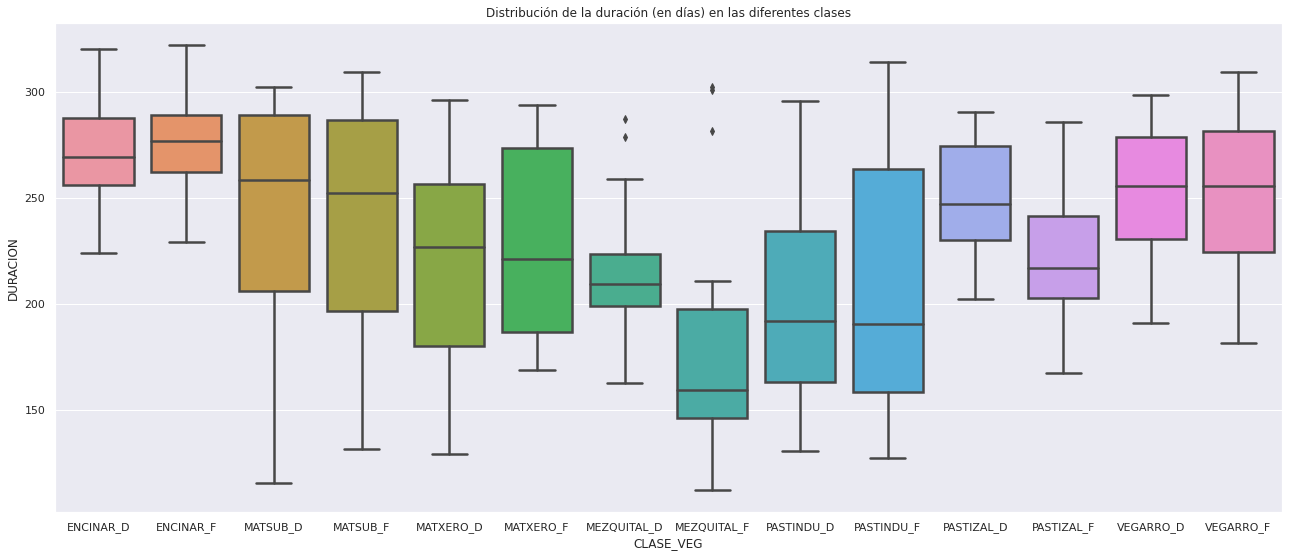

In [ ]:
sns.set(rc={'figure.figsize':(22,9)})
ax = sns.boxplot(x="CLASE_VEG", y="DURACION", data=datos_ndvi, linewidth=2.5)
ax.set_title('Distribución de la duración (en días) en las diferentes clases');

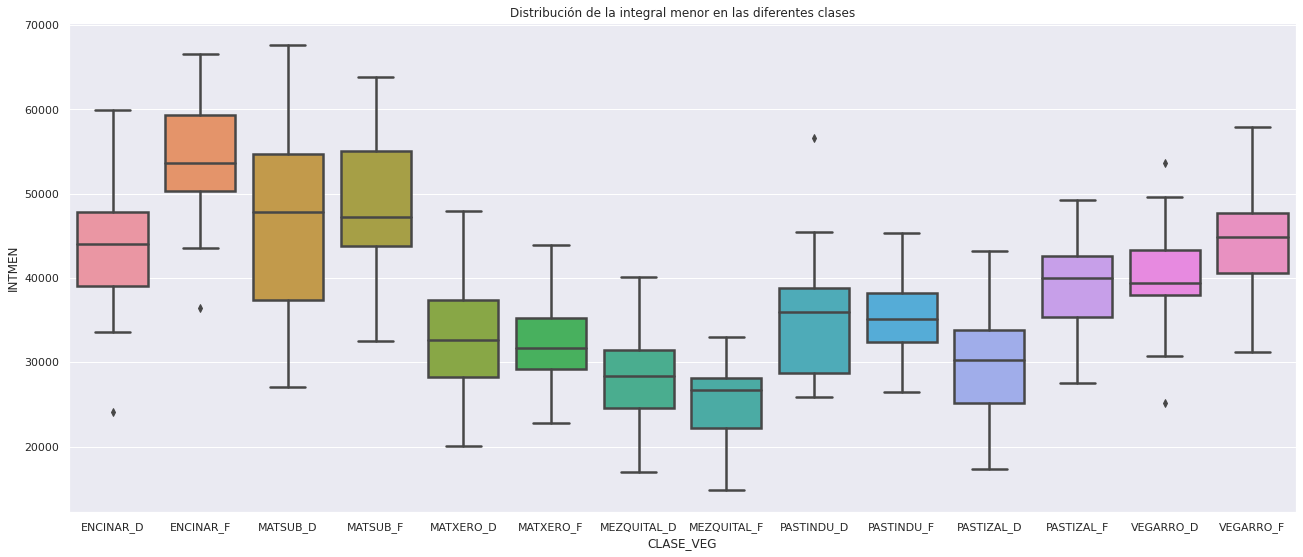

In [ ]:
sns.set(rc={'figure.figsize':(22,9)})
ax = sns.boxplot(x="CLASE_VEG", y="INTMEN", data=datos_ndvi, linewidth=2.5)
ax.set_title('Distribución de la integral menor en las diferentes clases');

### Removiendo Outliers

In [ ]:
#Para remover outliers utilizaremos Isolation Forest
model = IsolationForest(
                n_estimators  = 1000,
                max_samples   ='auto',
                contamination = 0.1,
                n_jobs        = -1,
                random_state  = 123,
            )

model.fit(datos_ndvi[['INICIO', 'AMPLITUD', 'DURACION', 'INTMEN']])

print(model.get_params())

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


{'bootstrap': False, 'contamination': 0.1, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 1000, 'n_jobs': -1, 'random_state': 123, 'verbose': 0, 'warm_start': False}


In [ ]:
datos_ndvi['scores'] = model.decision_function(datos_ndvi[['INICIO', 'AMPLITUD', 'DURACION', 'INTMEN']])

datos_ndvi['anomaly_score'] = model.predict(datos_ndvi[['INICIO', 'AMPLITUD', 'DURACION', 'INTMEN']])

In [ ]:
datos_ndvi[datos_ndvi['anomaly_score'] == -1]

,CLASE_VEG,inicio,inicio - (X),INICIO,AMPLITUD,duracion,DURACION,INTMAY,INTMEN,scores,anomaly_score
10,ENCINAR_D,241.20,230,179.20,3801,20.000,320.000,113800,58180,-0.020788,-1
19,ENCINAR_D,448.60,437,185.60,3925,19.460,311.360,117800,59900,-0.000935,-1
30,ENCINAR_F,241.00,230,176.00,4507,20.110,321.760,131000,66540,-0.071118,-1
38,ENCINAR_F,425.60,414,185.60,5416,16.590,265.440,110300,62190,-0.000413,-1
39,ENCINAR_F,448.40,437,182.40,4574,19.080,305.280,124500,64810,-0.005341,-1
46,MATSUB_D,151.20,138,211.20,4602,9.129,146.064,56190,27830,-0.036256,-1
48,MATSUB_D,195.80,184,188.80,5968,16.250,260.000,101500,58850,-0.035611,-1
50,MATSUB_D,240.80,230,172.80,5621,18.850,301.600,119500,67600,-0.100704,-1
58,MATSUB_D,425.70,414,187.20,5164,7.224,115.584,47750,27090,-0.033703,-1
60,MATSUB_F,10.36,0,165.76,5078,13.530,216.480,84350,47540,-0.011538,-1


In [ ]:
datos_ndvi_limpios = datos_ndvi[datos_ndvi['anomaly_score'] == 1]

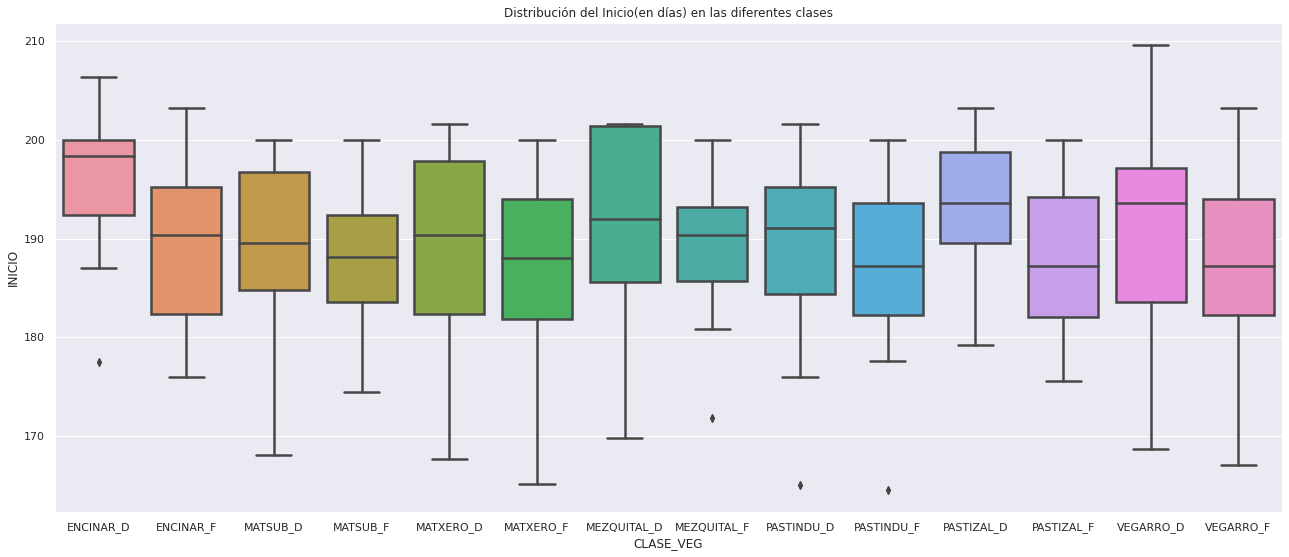

In [ ]:
sns.set(rc={'figure.figsize':(22,9)})
ax = sns.boxplot(x="CLASE_VEG", y="INICIO", data=datos_ndvi_limpios, linewidth=2.5)
ax.set_title('Distribución del Inicio(en días) en las diferentes clases');